Import thư viện

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    roc_curve, 
    recall_score, 
    confusion_matrix, 
    precision_score, 
    f1_score, 
    accuracy_score, 
    classification_report
    )

Load dữ liệu

In [15]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Summarize và pre-process dữ liệu

In [16]:
df.drop(["customerID"], axis=1, inplace=True)

In [17]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [18]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
0       0              0        1           0       1             0  \
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup   
0              1                0               0             2  \
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   
0                 0            0            0                0         0  \
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

In [19]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

# Fit với SVM, Decision Tree, Random Forest và đưa ra dự đoán

In [28]:
SupVec = SVC(random_state=1)
SupVec.fit(X_train, y_train)
test_pred = SupVec.predict(X_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.37      0.42      2113
weighted avg       1.00      0.73      0.85      2113



d:\Programmes\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programmes\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programmes\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)
test_pred = DT.predict(X_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1504
           1       0.53      0.49      0.51       609

    accuracy                           0.73      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.72      0.73      0.73      2113



In [30]:
RF = RandomForestClassifier(random_state=1)
RF.fit(X_train, y_train)
test_pred = RF.predict(X_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1631
           1       0.54      0.62      0.58       482

    accuracy                           0.79      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.80      0.79      0.80      2113



# Model Tuning với GridsearchCV

In [ ]:
# Code Here

## Gridseach CV với RandomForestClassifier

In [31]:
# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(RF, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the data
grid_search.fit(X, y)

# Extract the best hyperparameters from the fitted GridSearchCV instance
best_params = grid_search.best_params_

**Feature Importance**

In [33]:
# Extract the feature importances from the fitted Random Forest classifier
importances = RF.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

Feature ranking:
1. tenure (0.17617762406825005)
2. MonthlyCharges (0.1761185575678392)
3. TotalCharges (0.1622123297208354)
4. Contract (0.08677807378943798)
5. PaymentMethod (0.05417544244109389)
6. OnlineSecurity (0.044737176090121504)
7. TechSupport (0.03514066475304681)
8. InternetService (0.0284065633451609)
9. gender (0.027641118466690186)
10. OnlineBackup (0.026903447725312446)
11. PaperlessBilling (0.026728748287357603)
12. DeviceProtection (0.02671923625803739)
13. MultipleLines (0.02301846124195026)
14. Partner (0.021533229026655575)
15. SeniorCitizen (0.020386956050350687)
16. Dependents (0.020127107347875088)
17. StreamingMovies (0.019739589269763456)
18. StreamingTV (0.018066790258024212)
19. PhoneService (0.005388884292197476)


## Gridseach CV với DecisionTreeClassifier

In [32]:
# Define the hyperparameters to tune and their possible values
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the GridSearchCV class
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the data
grid_search.fit(X, y)

# Extract the best hyperparameters from the fitted GridSearchCV instance
best_params = grid_search.best_params_

**Feature Importance**

Feature ranking:
1. TotalCharges (0.1979802774343906)
2. MonthlyCharges (0.18852337911857575)
3. Contract (0.1708662042505311)
4. tenure (0.1267671087934331)
5. PaymentMethod (0.051387358773895817)
6. OnlineSecurity (0.04996947770971152)
7. gender (0.030056965968700895)
8. InternetService (0.02793653332606535)
9. PaperlessBilling (0.018702726725469025)
10. TechSupport (0.018681218771243725)
11. Partner (0.017686849412733744)
12. Dependents (0.01666643448143082)
13. OnlineBackup (0.016516197029589934)
14. DeviceProtection (0.014649613327784122)
15. SeniorCitizen (0.014475739749274087)
16. StreamingTV (0.013720957779439073)
17. MultipleLines (0.012470170040982278)
18. StreamingMovies (0.009140394849013455)
19. PhoneService (0.0038023924577356327)


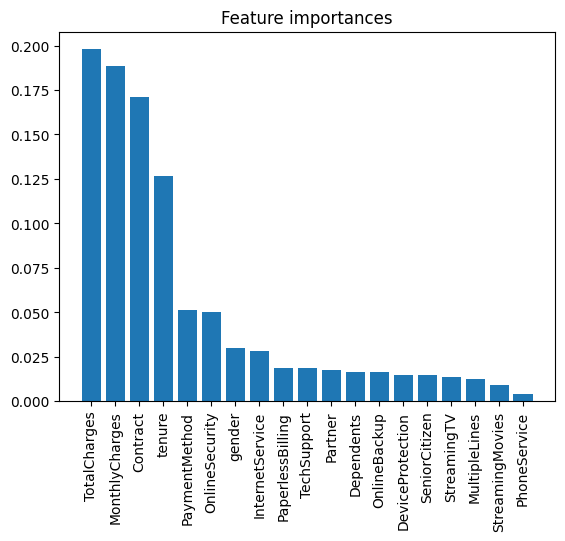

In [34]:
# Extract the feature importances from the fitted Random Forest classifier
importances = DT.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Optional: Tự implement lại Decistion Tree và fit với dữ liệu Customer Churn, so sánh kết quả của model của Sklearn

In [ ]:
# Code Here